# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *

# Summary of Lagrange Polynomials

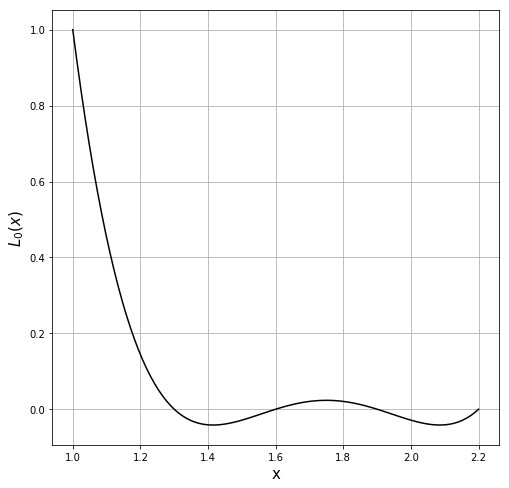

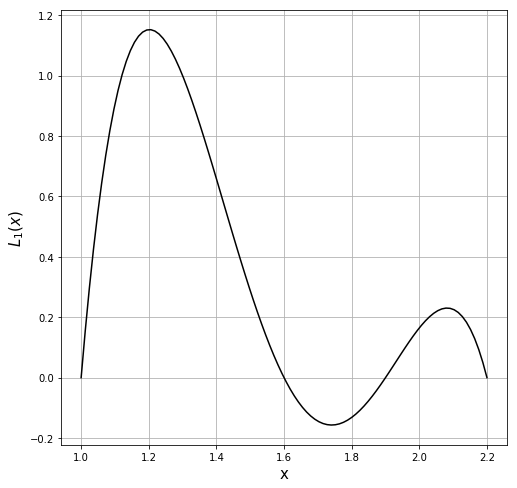

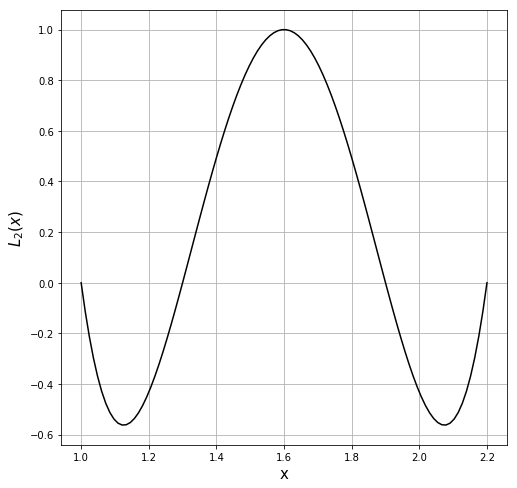

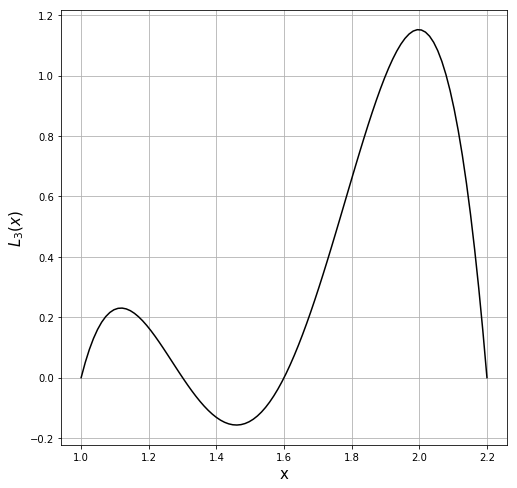

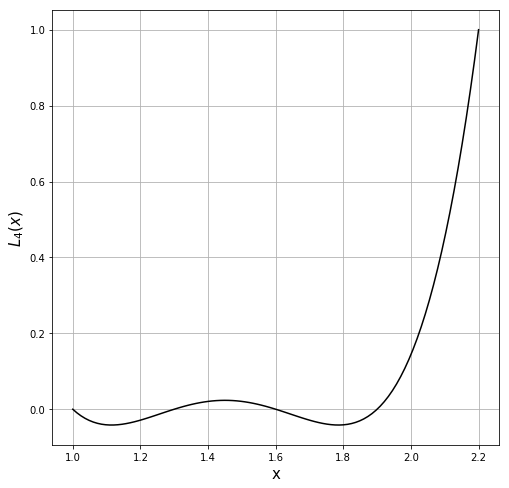

In [7]:
plot_x = np.linspace(1, 2.2, 100)

for k in range(len(L)):
    plot_L = []
    for i in range(len(plot_x)):
        plot_L = np.append(plot_L, L[k].subs(x, plot_x[i]) )

    fig = plt.figure(figsize = [8,8])
    plt.xlabel('x', fontsize = 15)
    plt.ylabel(r'$L_{}(x)$'.format(k), fontsize = 15)
    plt.plot(plot_x, plot_L, color = 'black')
    plt.grid(True)
    plt.savefig('L{}(x)'.format(k))

# Example

In this example, the following function and data points are used:

$$ f(x) = sin(3x) $$

x = 1, 1.3, 1.6, 1.9 and 2.2

In [4]:
x_data = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx_data = np.sin(3*x_data)

## Lagrange Interpolation Algorithm

In [5]:
x = symbols('x')

def Lagrange(x_data, y_data):
    n = len(x_data)
    L = [1] * n
    P = 0
    for k in range(n):
        for j in range(n):
            if (j!=k):
                L[k] = L[k] * ( (x - x_data[j]) / (x_data[k] - x_data[j]) )
        P = P + fx_data[k]*L[k]
    return L, P

In [6]:
L, P = Lagrange(x_data, fx_data)

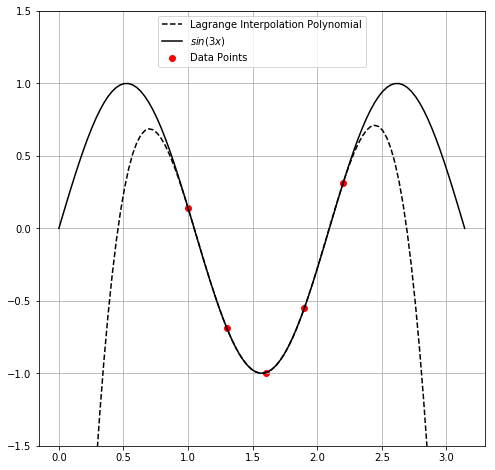

In [8]:
plot_x = np.linspace(0, np.pi, 100)
plot_P = []
sin3x = []
for i in range(len(plot_x)):
    plot_P = np.append(plot_P, P.subs(x, plot_x[i]) )
    sin3x = np.append(sin3x, np.sin(3*plot_x[i]))
    
fig = plt.figure(figsize = [8,8])
plt.plot(plot_x, plot_P, color = 'black', label = 'Lagrange Interpolation Polynomial', linestyle = '--')
plt.plot(plot_x, sin3x, color = 'black', label = r'$sin(3x)$')
plt.scatter(x_data, fx_data, color = 'red', label = 'Data Points')
plt.grid(True)
plt.ylim([-1.5,1.5])
plt.legend(loc = 'upper center')

plt.savefig('P(x)')

## Neville's Algorithm

In [25]:
def neville(x_data, fx_data):
    """
    Generates the Lagrange Interpolating Polynomial for a data set.
    Input:
      x_data: x data points from a n-dimensional list.
      fx_data: f(x) data points from a n-dimensional list.
    Output:
      p[0]: The Lagrange Interpolating Polynomial
    """
    
    x = symbols('x')
    
    n = len(x_data)
    p = n*[0]
    for k in range(n):
        for i in range(n-k):
            if k == 0:
                p[i] = fx_data[i]
            else:
                p[i] = ( (x-x_data[i+k])*p[i]+ \
                         (x_data[i]-x)*p[i+1])/ \
                         (x_data[i]-x_data[i+k])
    return p[0]

p = neville(datax, datay)

In [30]:
P = neville(x_data, fx_data)

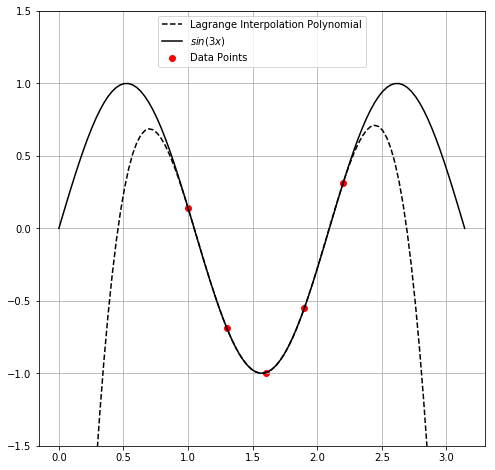

In [31]:
plot_x = np.linspace(0, np.pi, 100)
plot_P = []
sin3x = []
for i in range(len(plot_x)):
    plot_P = np.append(plot_P, P.subs(x, plot_x[i]) )
    sin3x = np.append(sin3x, np.sin(3*plot_x[i]))
    
fig = plt.figure(figsize = [8,8])
plt.plot(plot_x, plot_P, color = 'black', label = 'Lagrange Interpolation Polynomial', linestyle = '--')
plt.plot(plot_x, sin3x, color = 'black', label = r'$sin(3x)$')
plt.scatter(x_data, fx_data, color = 'red', label = 'Data Points')
plt.grid(True)
plt.ylim([-1.5,1.5])
plt.legend(loc = 'upper center')

plt.savefig('P(x)')